In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
107,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185,NaN
64,85922302,M,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,...,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310,NaN
397,90401602,B,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,...,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053,NaN
44,85638502,M,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,...,29.89,105.50,740.7,0.15030,0.39040,0.37280,0.16070,0.3693,0.09618,NaN
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,...,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,NaN


In [5]:
df.drop(columns=["id","Unnamed: 32"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.isnull().mean()*100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [8]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["diagnosis"]=encoder.fit_transform(df["diagnosis"])

In [10]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1]


In [11]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)
scaler.fit_transform(X_train,X_test)

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)

In [18]:
X_train.shape

(381, 30)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 172 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              381 non-null    float64
 1   texture_mean             381 non-null    float64
 2   perimeter_mean           381 non-null    float64
 3   area_mean                381 non-null    float64
 4   smoothness_mean          381 non-null    float64
 5   compactness_mean         381 non-null    float64
 6   concavity_mean           381 non-null    float64
 7   concave points_mean      381 non-null    float64
 8   symmetry_mean            381 non-null    float64
 9   fractal_dimension_mean   381 non-null    float64
 10  radius_se                381 non-null    float64
 11  texture_se               381 non-null    float64
 12  perimeter_se             381 non-null    float64
 13  area_se                  381 non-null    float64
 14  smoothness_se            381 

In [20]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 172 to 102
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   diagnosis  381 non-null    int32
dtypes: int32(1)
memory usage: 4.5 KB


In [21]:
X_test.shape

(188, 30)

In [22]:
neigh.fit(X_train, y_train)

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [23]:
from sklearn.metrics import accuracy_score

y_pred = neigh.predict(X_test)

accuracy_score(y_test, y_pred)


0.9680851063829787

## Hyperparameter

we will try an experimental approach inorder to predict the best k value for our data set 

In [24]:
scores =[]
for i in range(1,25):
    neigh= KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_predict=neigh.predict(X_test)
    scores.append(accuracy_score(y_predict,y_test))


C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: 

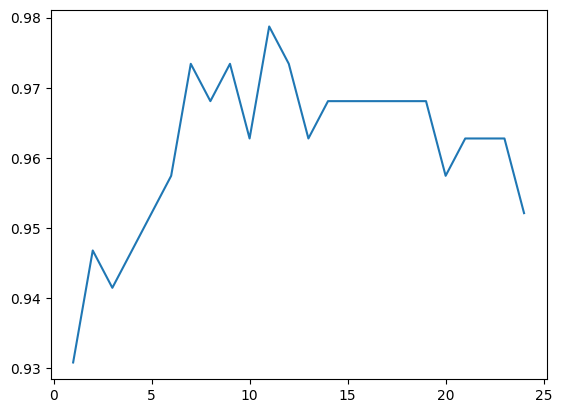

In [25]:
plt.plot(range(1,25),scores)

## So after using the experimental method we can probably say our model best predict for k value=12 in which acuracy score turns out to be highest